In [2]:
# Libraries 
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import talib as ta
from statistics import stdev

In [3]:
company = pd.read_csv("data/REL_SIX_MON.csv", thousands=",")
company

,Date,series,OPEN,HIGH,LOW,PREV. CLOSE,ltp,close,vwap,52W H,52W L,VOLUME,VALUE,No of trades
0,30-Jun-2023,EQ,2546.40,2556.65,2533.45,2529.50,2553.35,2550.25,2543.75,2755.00,2180.0,5146441,1.309125e+10,223168
1,28-Jun-2023,EQ,2513.00,2537.85,2497.85,2496.45,2530.35,2529.50,2525.48,2755.00,2180.0,5239872,1.323321e+10,190293
2,27-Jun-2023,EQ,2496.55,2509.50,2486.65,2495.55,2495.00,2496.45,2496.25,2755.00,2180.0,4471687,1.116243e+10,157574
3,26-Jun-2023,EQ,2507.00,2515.40,2488.70,2514.75,2495.25,2495.55,2500.04,2755.00,2180.0,5833893,1.458496e+10,140793
4,23-Jun-2023,EQ,2528.90,2533.40,2512.00,2535.50,2517.80,2514.75,2521.55,2755.00,2180.0,3059084,7.713645e+09,136010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
117,06-Jan-2023,EQ,2526.65,2547.95,2518.30,2514.05,2537.00,2536.90,2534.90,2856.15,2180.0,2930338,7.428125e+09,157118
118,05-Jan-2023,EQ,2523.50,2536.40,2504.00,2518.55,2521.80,2514.05,2516.50,2856.15,2180.0,6293519,1.583764e+10,197434
119,04-Jan-2023,EQ,2557.00,2561.05,2514.00,2557.05,2516.65,2518.55,2529.71,2856.15,2180.0,4275746,1.081640e+10,182754
120,03-Jan-2023,EQ,2565.05,2573.00,2547.80,2575.90,2555.80,2557.05,2558.48,2856.15,2180.0,3534596,9.043199e+09,135268


In [16]:
company.columns = company.columns.str.replace(' ','')

In [17]:
company.columns

Index(['Date', 'series', 'OPEN', 'HIGH', 'LOW', 'PREV.CLOSE', 'ltp', 'close',
       'vwap', '52WH', '52WL', 'VOLUME', 'VALUE', 'Nooftrades'],
      dtype='object')

In [18]:
data = company.loc[:,['Date', 'close']]
data

,Date,close
0,30-Jun-2023,2550.25
1,28-Jun-2023,2529.50
2,27-Jun-2023,2496.45
3,26-Jun-2023,2495.55
4,23-Jun-2023,2514.75
...,...,...
117,06-Jan-2023,2536.90
118,05-Jan-2023,2514.05
119,04-Jan-2023,2518.55
120,03-Jan-2023,2557.05


In [7]:
data

,Date,close
0,30-Jun-2023,2550.25
1,28-Jun-2023,2529.50
2,27-Jun-2023,2496.45
3,26-Jun-2023,2495.55
4,23-Jun-2023,2514.75
...,...,...
117,06-Jan-2023,2536.90
118,05-Jan-2023,2514.05
119,04-Jan-2023,2518.55
120,03-Jan-2023,2557.05


In [22]:
data['mean'] = data.close.mean()
data['UpperOneSD'] = data.close.mean()+stdev(data.close)
data['UpperTwoSD'] = data.close.mean()+(stdev(data.close)*2)
data['LowerOneSD'] = data.close.mean()-stdev(data.close)
data['LowerTwoSD'] = data.close.mean()-(stdev(data.close)*2)

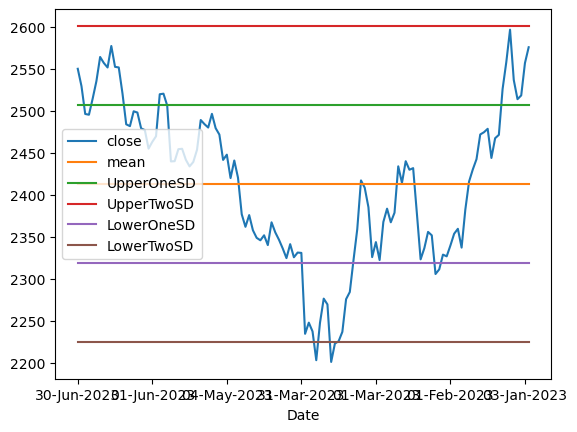

In [24]:
data.plot();

In [20]:
data.index = data.Date

In [23]:
data

,Date,close,mean,UpperOneSD,UpperTwoSD,LowerOneSD,LowerTwoSD
Date,,,,,,,
30-Jun-2023,30-Jun-2023,2550.25,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
28-Jun-2023,28-Jun-2023,2529.50,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
27-Jun-2023,27-Jun-2023,2496.45,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
26-Jun-2023,26-Jun-2023,2495.55,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
23-Jun-2023,23-Jun-2023,2514.75,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
...,...,...,...,...,...,...,...
06-Jan-2023,06-Jan-2023,2536.90,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
05-Jan-2023,05-Jan-2023,2514.05,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
04-Jan-2023,04-Jan-2023,2518.55,2412.962705,2507.120012,2601.277319,2318.805398,2224.648091
